In [1]:
# auto update python files
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
# import libraries
import sys
sys.path.append('../tracking_validation/')

In [4]:
import numpy as np
from utils import *
from association_gate import association_gate
#from temp_csv_parser import *


In [5]:
# load association params
from load_association_params import AssociationParams
params = AssociationParams("/home/yoshiri/autoware/src/universe/autoware.universe/perception/multi_object_tracker/config/data_association_matrix.param.yaml")
params.getAssociationParams("CAR", "CAR")

[2.0, 3.6, 12.1, 1.047, 0.1]

In [20]:
# rosbag 
rosbag_file = "/home/yoshiri/autoware_bag/SPkadai/117/scenario_0_0.db3"
rosbag_file = "/home/yoshiri/autoware/inittest/rosbag2_2023_05_09-09_24_48_0.db3"
rosbag_file = "/home/yoshiri/autoware/inittest2/inittest2_0.db3"

topic_list = ["/perception/object_recognition/detection/objects","/perception/object_recognition/tracking/objects"]

# get topics dict
#topics_dict = get_topics_dict(rosbag_file, topic_list)

In [7]:
from autoware_auto_perception_msgs.msg import DetectedObject
from autoware_auto_perception_msgs.msg import TrackedObject
from autoware_auto_perception_msgs.msg import DetectedObjectKinematics
from autoware_auto_perception_msgs.msg import ObjectClassification
from autoware_auto_perception_msgs.msg import Shape

In [21]:
from tracking_parser import TrackingParser, DetectionParser
tp = TrackingParser(rosbag_file)
dp = DetectionParser(rosbag_file)

[INFO 1683597786.842058747] [rosbag2_storage]: Opened database '/home/yoshiri/autoware/inittest2/inittest2_0.db3' for READ_ONLY. (open() at ./src/rosbag2_storage_default_plugins/sqlite/sqlite_storage.cpp:204)
[INFO 1683597787.782972495] [rosbag2_storage]: Opened database '/home/yoshiri/autoware/inittest2/inittest2_0.db3' for READ_ONLY. (open() at ./src/rosbag2_storage_default_plugins/sqlite/sqlite_storage.cpp:204)


(<Figure size 1600x1500 with 6 Axes>,
 array([<AxesSubplot:title={'center':'x'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'y'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'yaw'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'vx'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'covariance_x'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'covariance_vx'}, xlabel='time [s]'>],
       dtype=object))

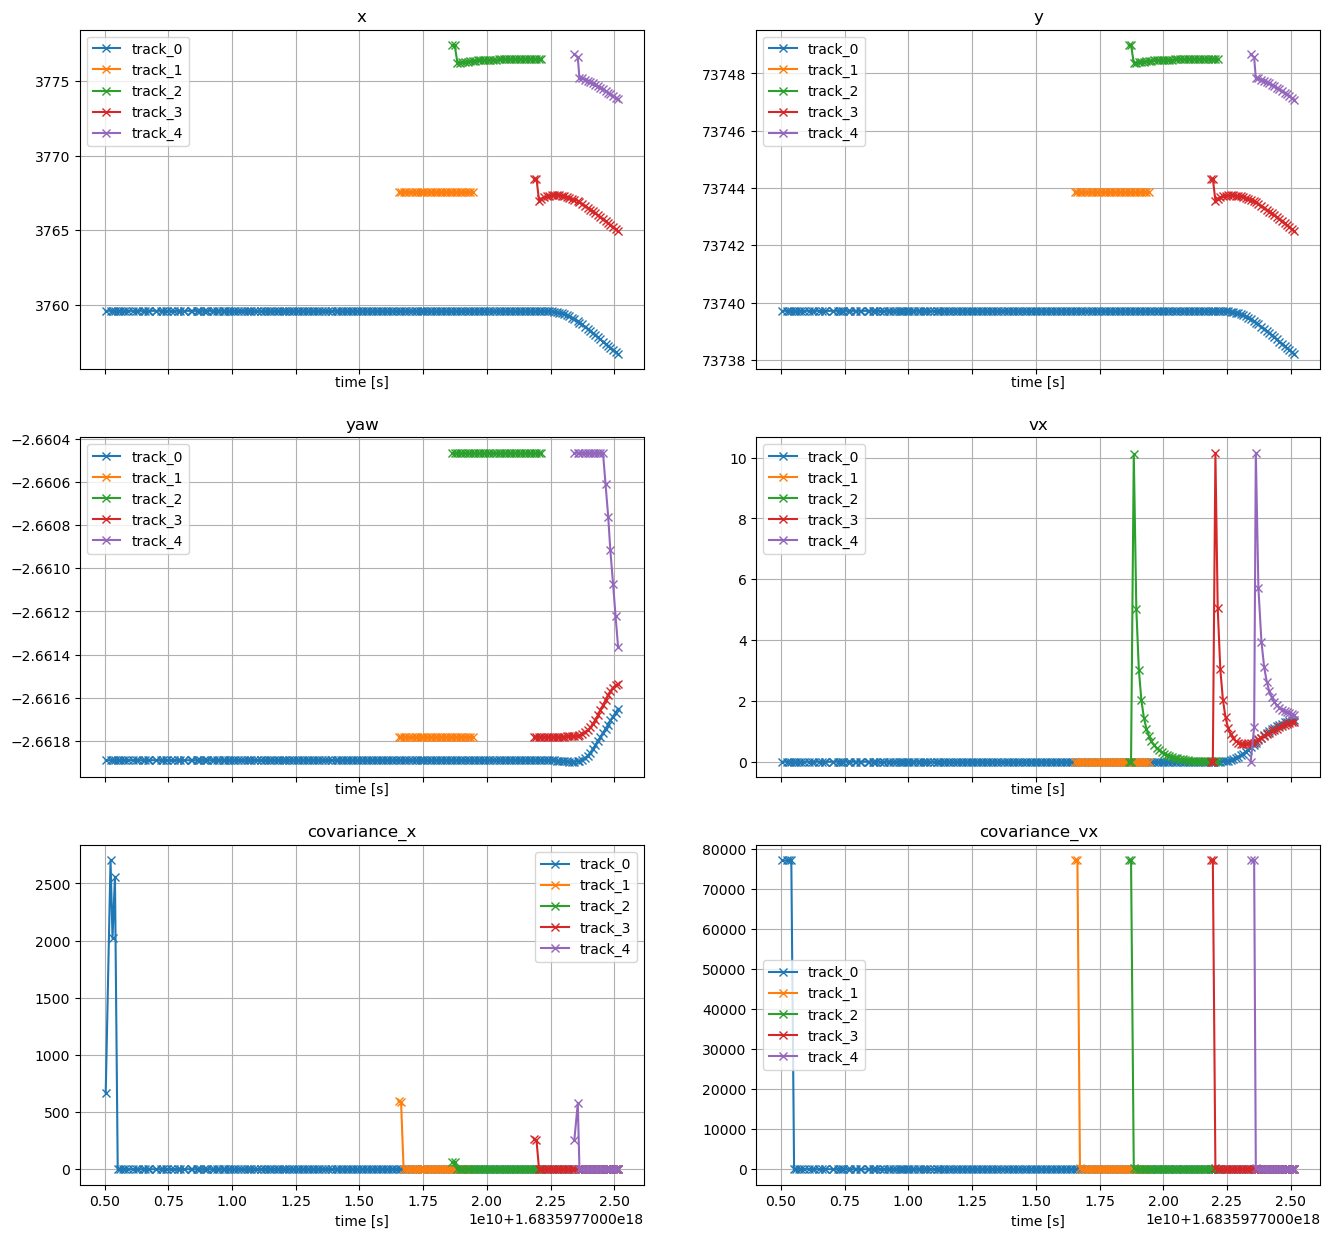

In [22]:
tp.plot_data()

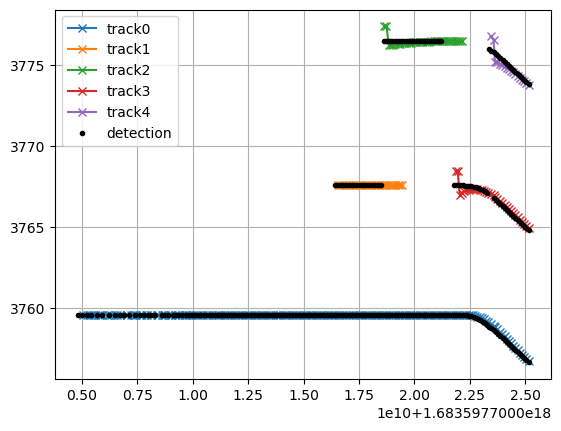

In [23]:
import matplotlib.pyplot as plt

tp.plot_kinematics("time","x")
plt.plot(dp.data["time"], dp.data["x"], 'k.')
plt.legend(["track0","track1","track2","track3","track4","detection"])
plt.grid()

[INFO 1683600333.402595469] [rosbag2_storage]: Opened database '/home/yoshiri/autoware/inittest3/inittest3_0.db3' for READ_ONLY. (open() at ./src/rosbag2_storage_default_plugins/sqlite/sqlite_storage.cpp:204)
[INFO 1683600334.366585324] [rosbag2_storage]: Opened database '/home/yoshiri/autoware/inittest3/inittest3_0.db3' for READ_ONLY. (open() at ./src/rosbag2_storage_default_plugins/sqlite/sqlite_storage.cpp:204)


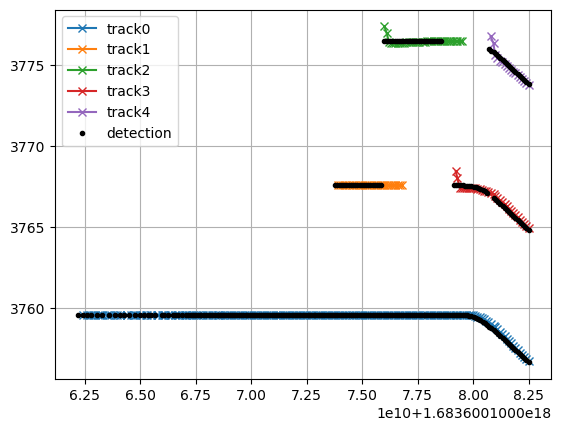

In [25]:
rosbag_file = "/home/yoshiri/autoware/inittest3/inittest3_0.db3"
tp2 = TrackingParser(rosbag_file)
dp2 = DetectionParser(rosbag_file)

tp2.plot_kinematics("time","x")
plt.plot(dp2.data["time"], dp2.data["x"], 'k.')
plt.legend(["track0","track1","track2","track3","track4","detection"])
plt.grid()

(<Figure size 1600x1500 with 6 Axes>,
 array([<AxesSubplot:title={'center':'x'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'y'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'yaw'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'vx'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'covariance_x'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'covariance_vx'}, xlabel='time [s]'>],
       dtype=object))

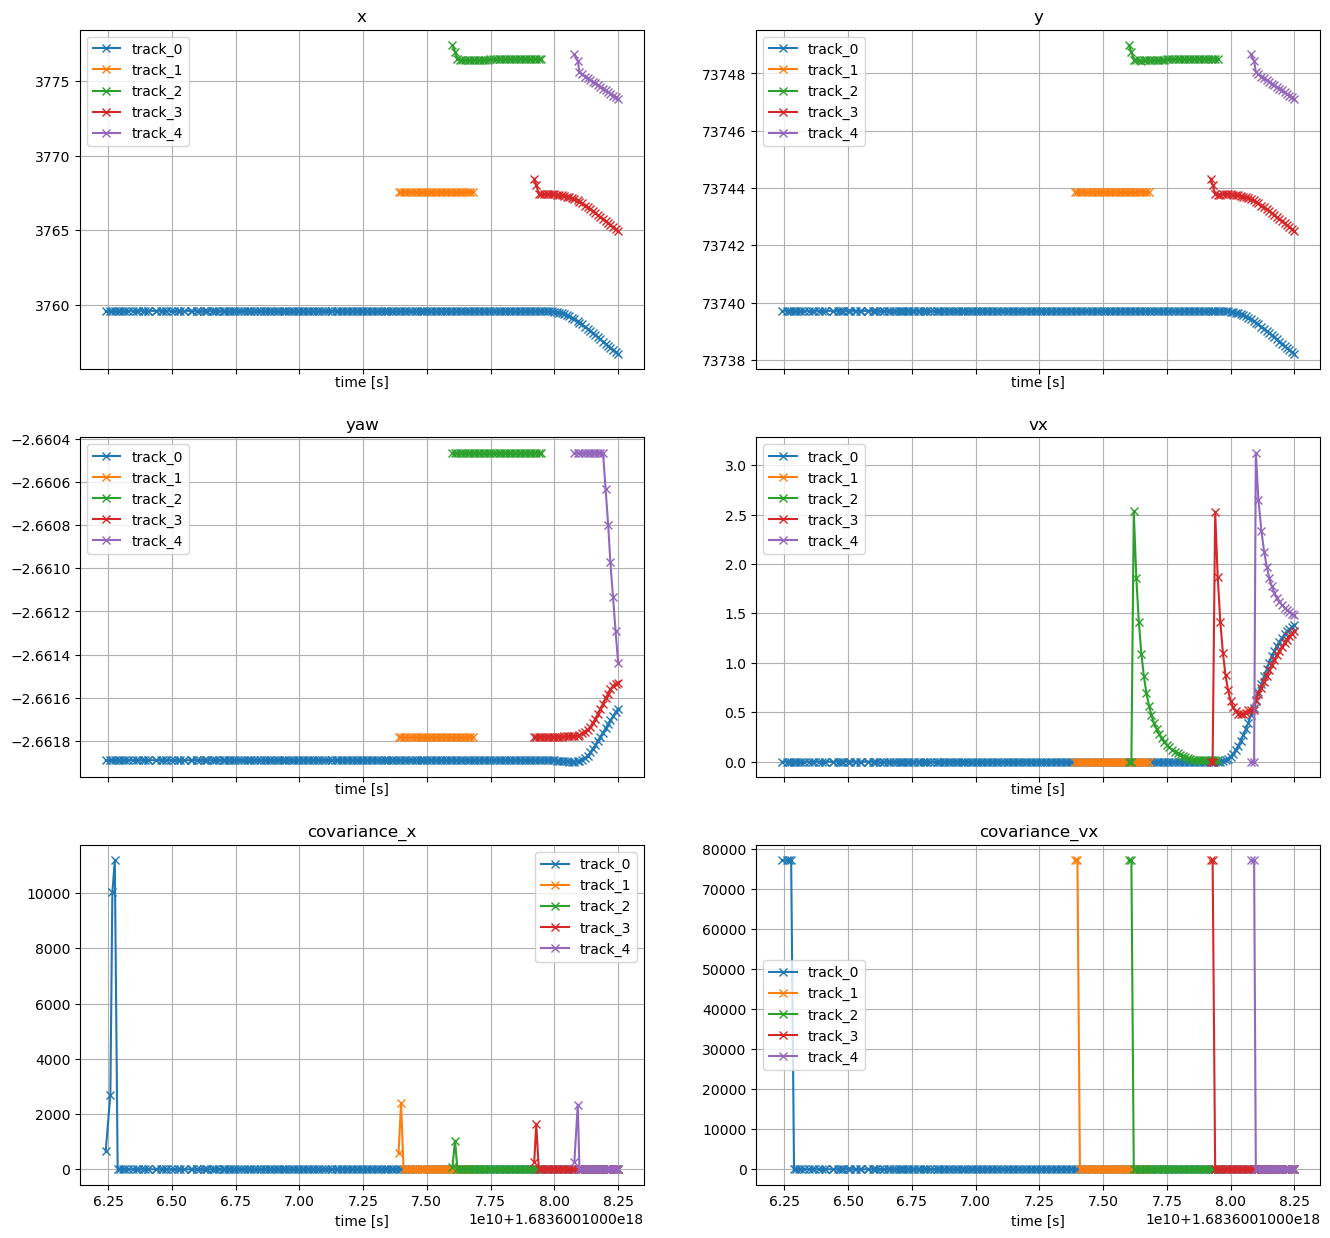

In [26]:
tp2.plot_data()

[INFO 1683607250.464807686] [rosbag2_storage]: Opened database '/home/yoshiri/autoware/inittest4/inittest4_0.db3' for READ_ONLY. (open() at ./src/rosbag2_storage_default_plugins/sqlite/sqlite_storage.cpp:204)
[INFO 1683607251.287426912] [rosbag2_storage]: Opened database '/home/yoshiri/autoware/inittest4/inittest4_0.db3' for READ_ONLY. (open() at ./src/rosbag2_storage_default_plugins/sqlite/sqlite_storage.cpp:204)


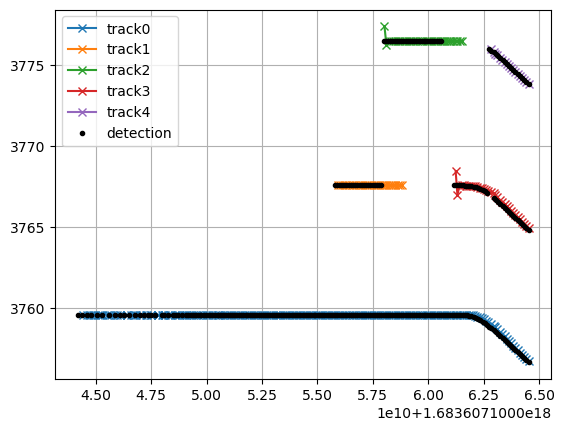

In [27]:
rosbag_file = "/home/yoshiri/autoware/inittest4/inittest4_0.db3"
tp4 = TrackingParser(rosbag_file)
dp4 = DetectionParser(rosbag_file)

tp4.plot_kinematics("time","x")
plt.plot(dp4.data["time"], dp4.data["x"], 'k.')
plt.legend(["track0","track1","track2","track3","track4","detection"])
plt.grid()

(<Figure size 1600x1500 with 6 Axes>,
 array([<AxesSubplot:title={'center':'x'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'y'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'yaw'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'vx'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'covariance_x'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'covariance_vx'}, xlabel='time [s]'>],
       dtype=object))

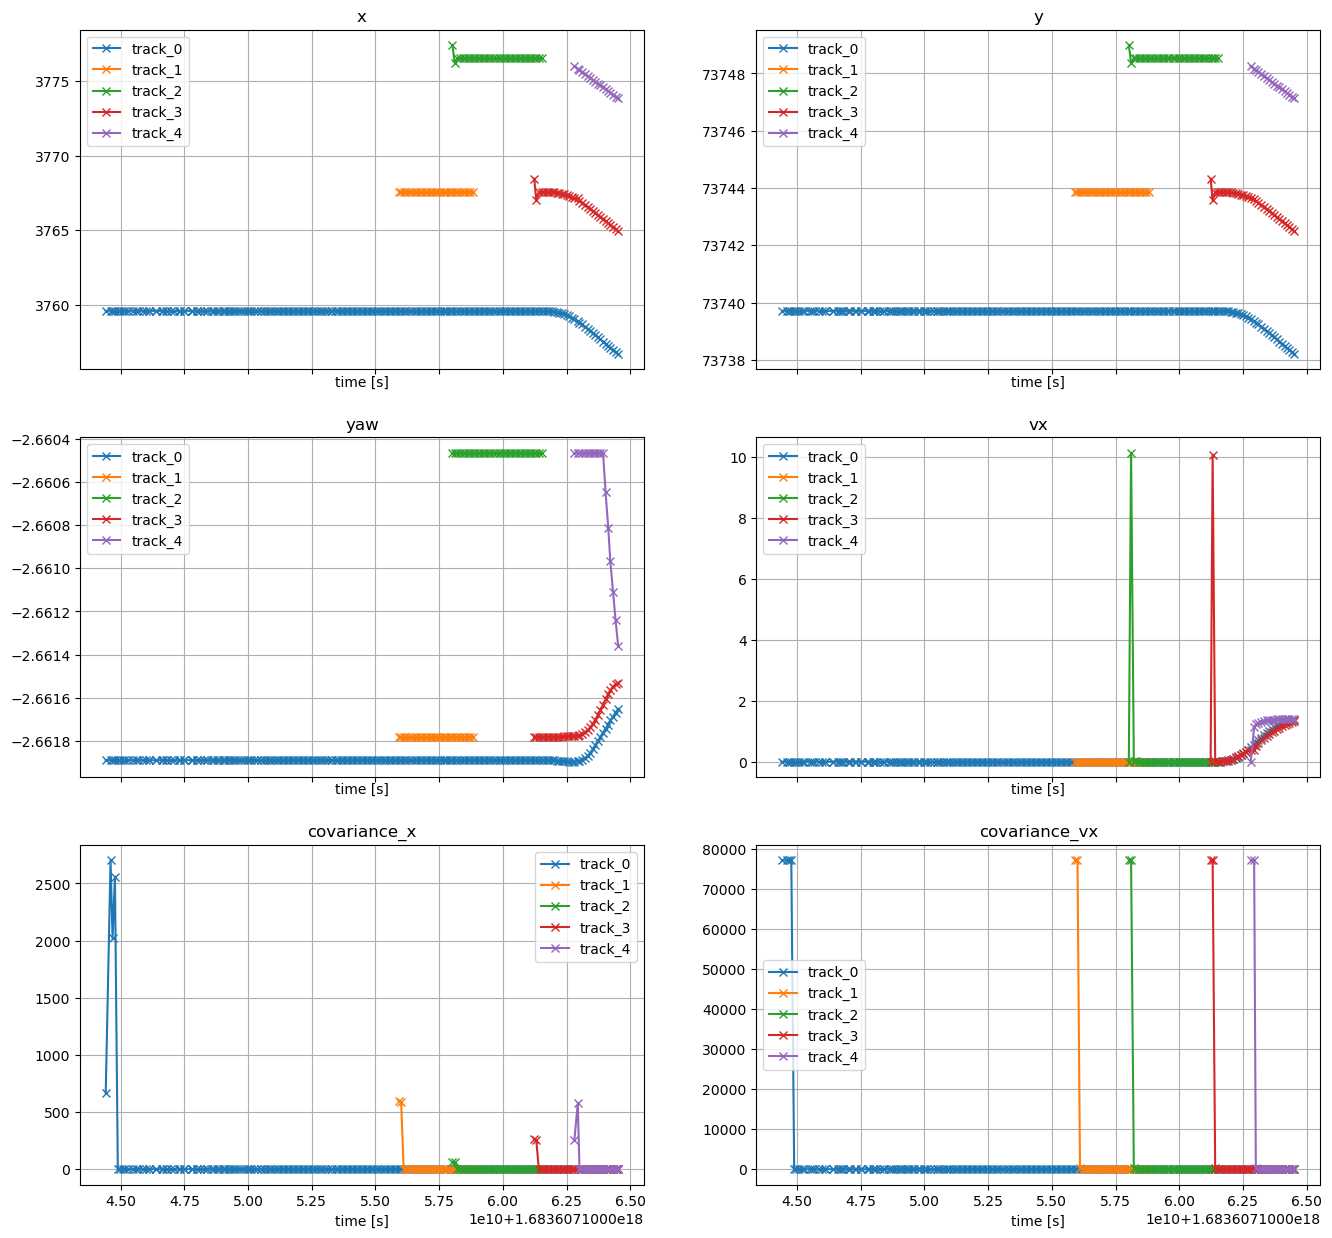

In [28]:
tp4.plot_data()

In [31]:
for key in tp4.data.keys():
    print(tp4.data[key][0][1].kinematics.pose_with_covariance.pose.position.x)

3759.5928970352898
3767.5765593117217
3777.414540421073
3768.463640294425
3776.011540191114


In [32]:
max(dp4.data["x"])

3776.5280654667376

[INFO 1683611314.212046134] [rosbag2_storage]: Opened database '/home/yoshiri/autoware/inittest5/inittest5_0.db3' for READ_ONLY. (open() at ./src/rosbag2_storage_default_plugins/sqlite/sqlite_storage.cpp:204)
[INFO 1683611315.182792810] [rosbag2_storage]: Opened database '/home/yoshiri/autoware/inittest5/inittest5_0.db3' for READ_ONLY. (open() at ./src/rosbag2_storage_default_plugins/sqlite/sqlite_storage.cpp:204)


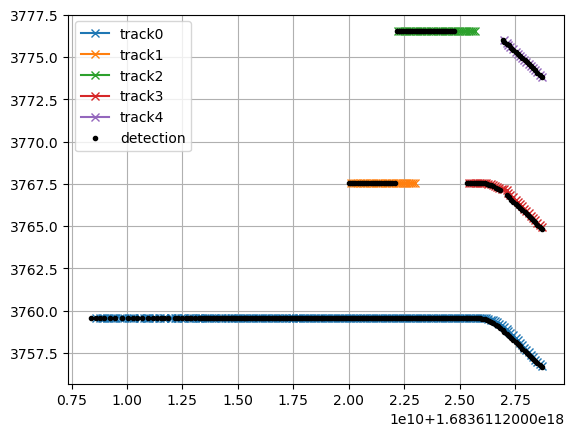

In [33]:
rosbag_file = "/home/yoshiri/autoware/inittest5/inittest5_0.db3"
tp5 = TrackingParser(rosbag_file)
dp5 = DetectionParser(rosbag_file)

tp5.plot_kinematics("time","x")
plt.plot(dp5.data["time"], dp5.data["x"], 'k.')
plt.legend(["track0","track1","track2","track3","track4","detection"])
plt.grid()

(<Figure size 1600x1500 with 6 Axes>,
 array([<AxesSubplot:title={'center':'x'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'y'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'yaw'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'vx'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'covariance_x'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'covariance_vx'}, xlabel='time [s]'>],
       dtype=object))

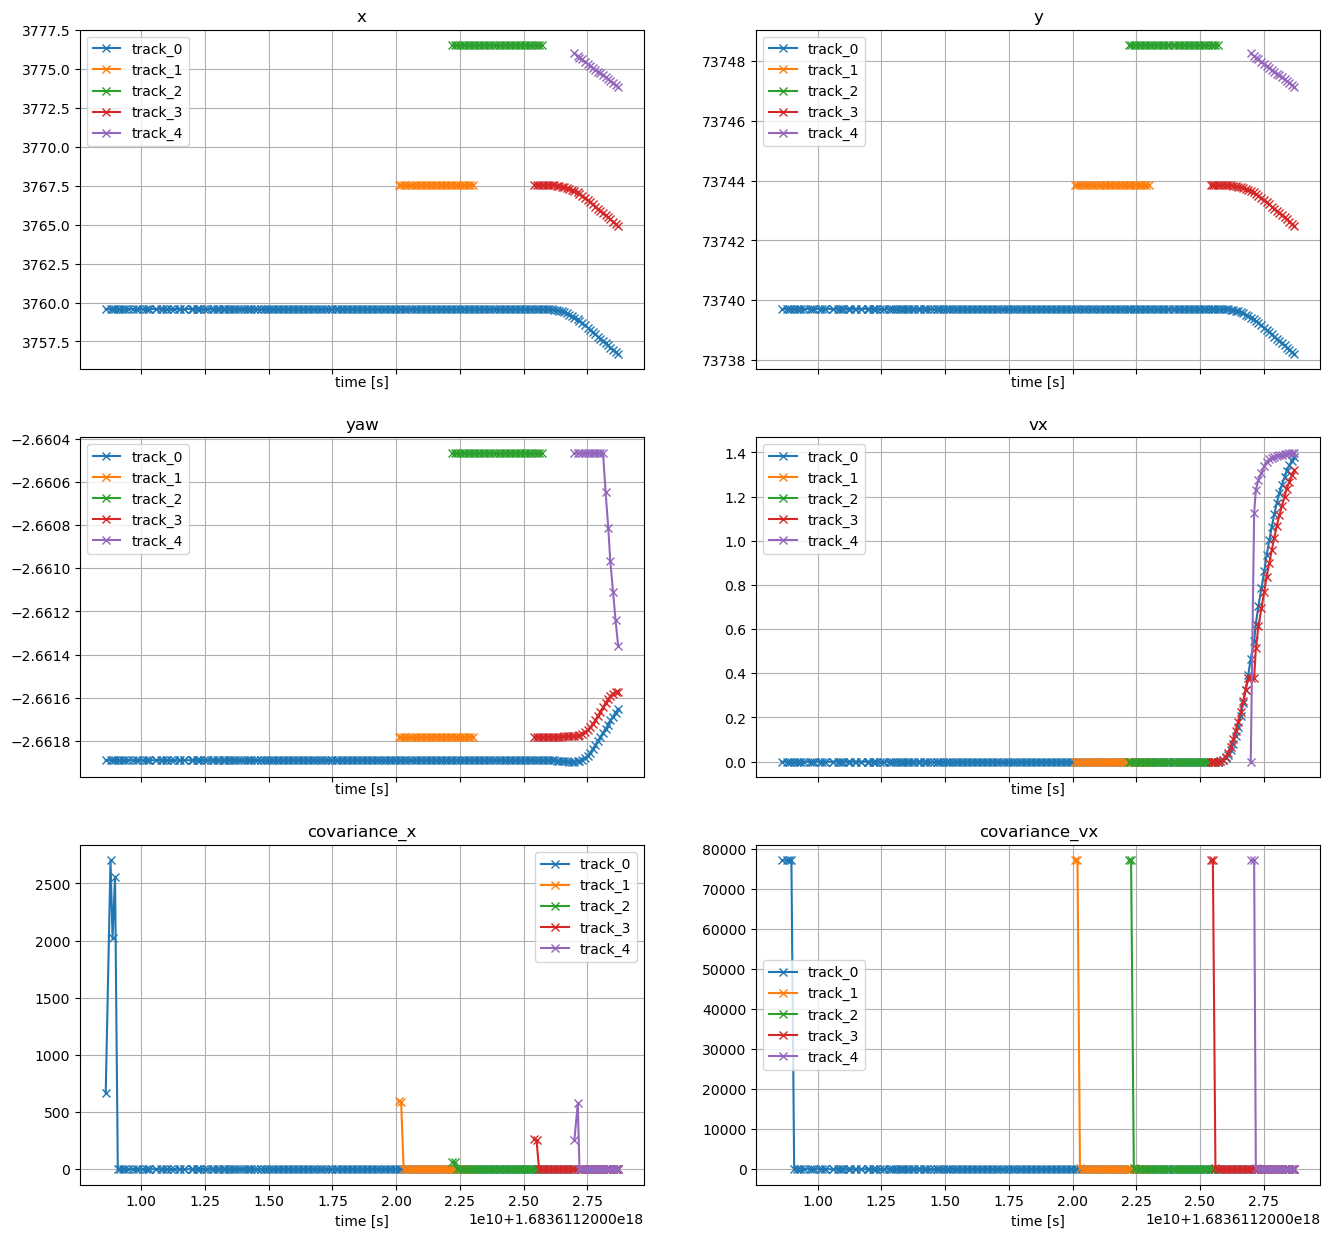

In [34]:
tp5.plot_data()

[INFO 1683618467.678103663] [rosbag2_storage]: Opened database '/home/yoshiri/autoware/inittest7/inittest7_0.db3' for READ_ONLY. (open() at ./src/rosbag2_storage_default_plugins/sqlite/sqlite_storage.cpp:204)
[INFO 1683618468.913811048] [rosbag2_storage]: Opened database '/home/yoshiri/autoware/inittest7/inittest7_0.db3' for READ_ONLY. (open() at ./src/rosbag2_storage_default_plugins/sqlite/sqlite_storage.cpp:204)


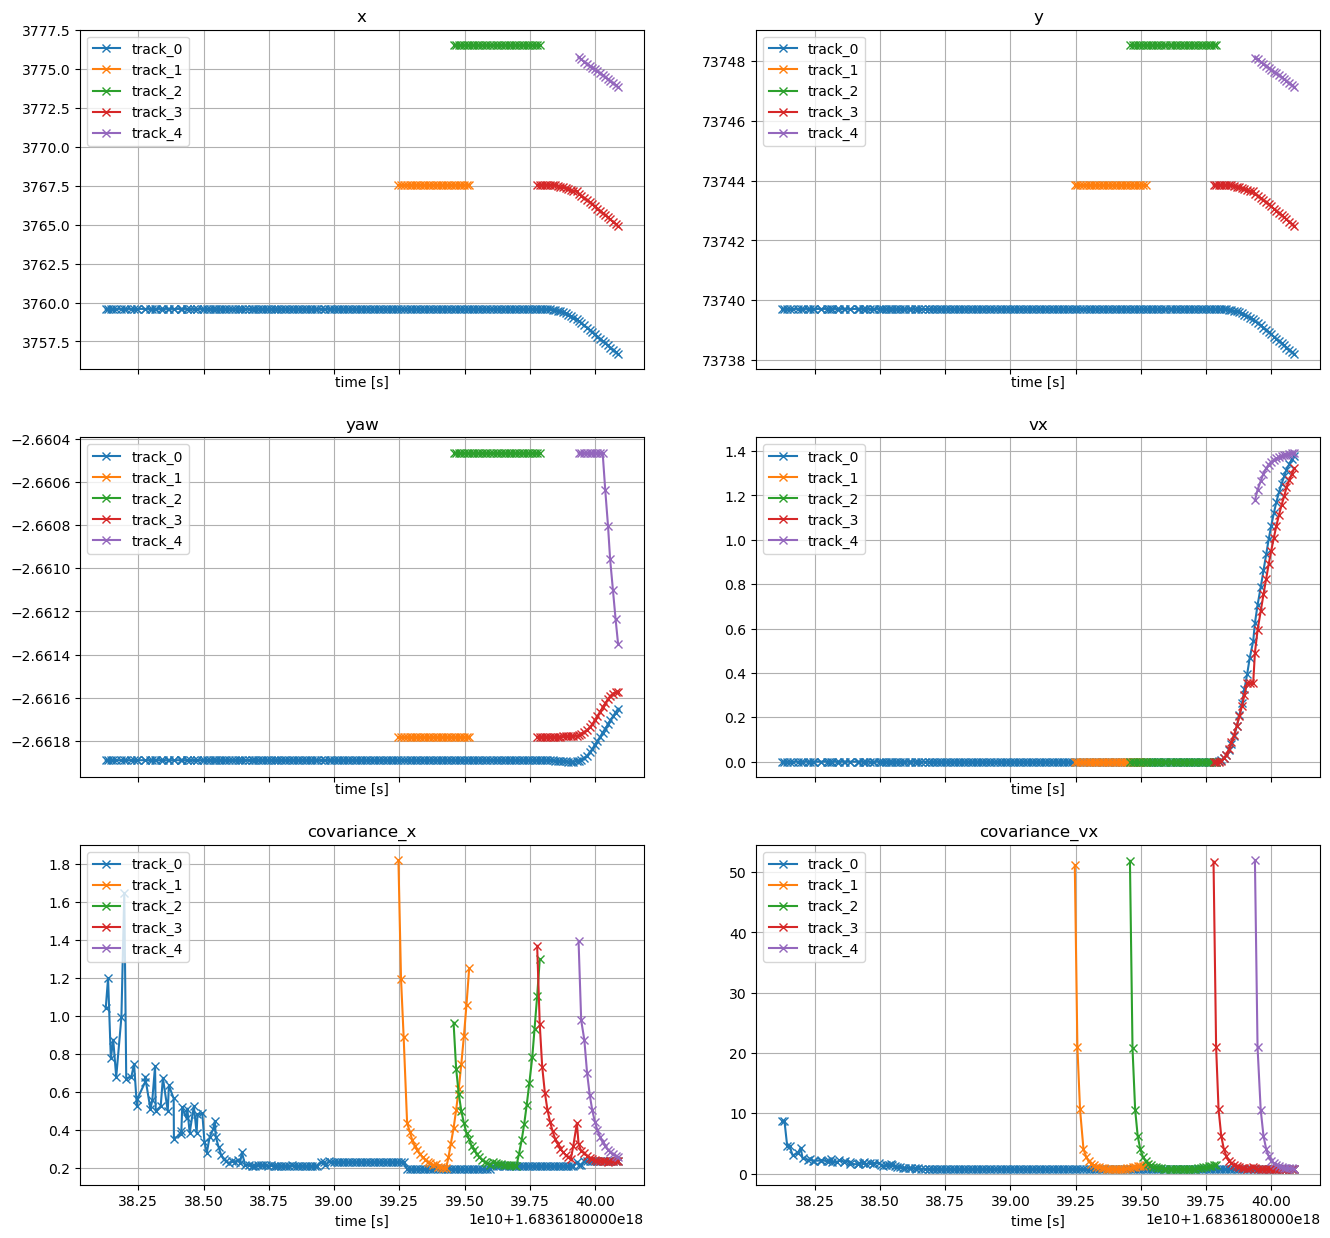

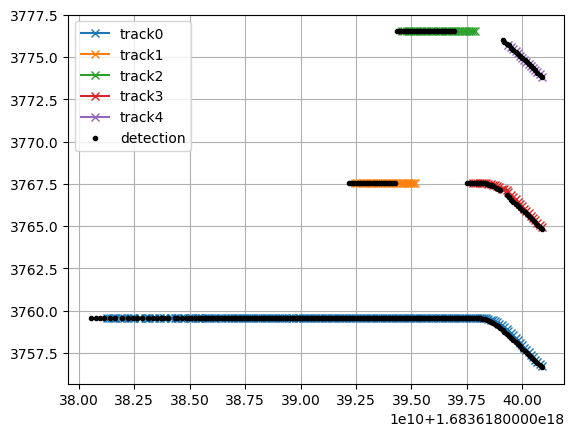

In [40]:
rosbag_file = "/home/yoshiri/autoware/inittest7/inittest7_0.db3"
tp6 = TrackingParser(rosbag_file)
dp6 = DetectionParser(rosbag_file)


tp6.plot_data()
tp6.plot_kinematics("time","x")
plt.plot(dp6.data["time"], dp6.data["x"], 'k.')
plt.legend(["track0","track1","track2","track3","track4","detection"])
plt.grid()

(<Figure size 1600x1500 with 6 Axes>,
 array([<AxesSubplot:title={'center':'x'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'y'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'yaw'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'vx'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'covariance_x'}, xlabel='time [s]'>,
        <AxesSubplot:title={'center':'covariance_vx'}, xlabel='time [s]'>],
       dtype=object))

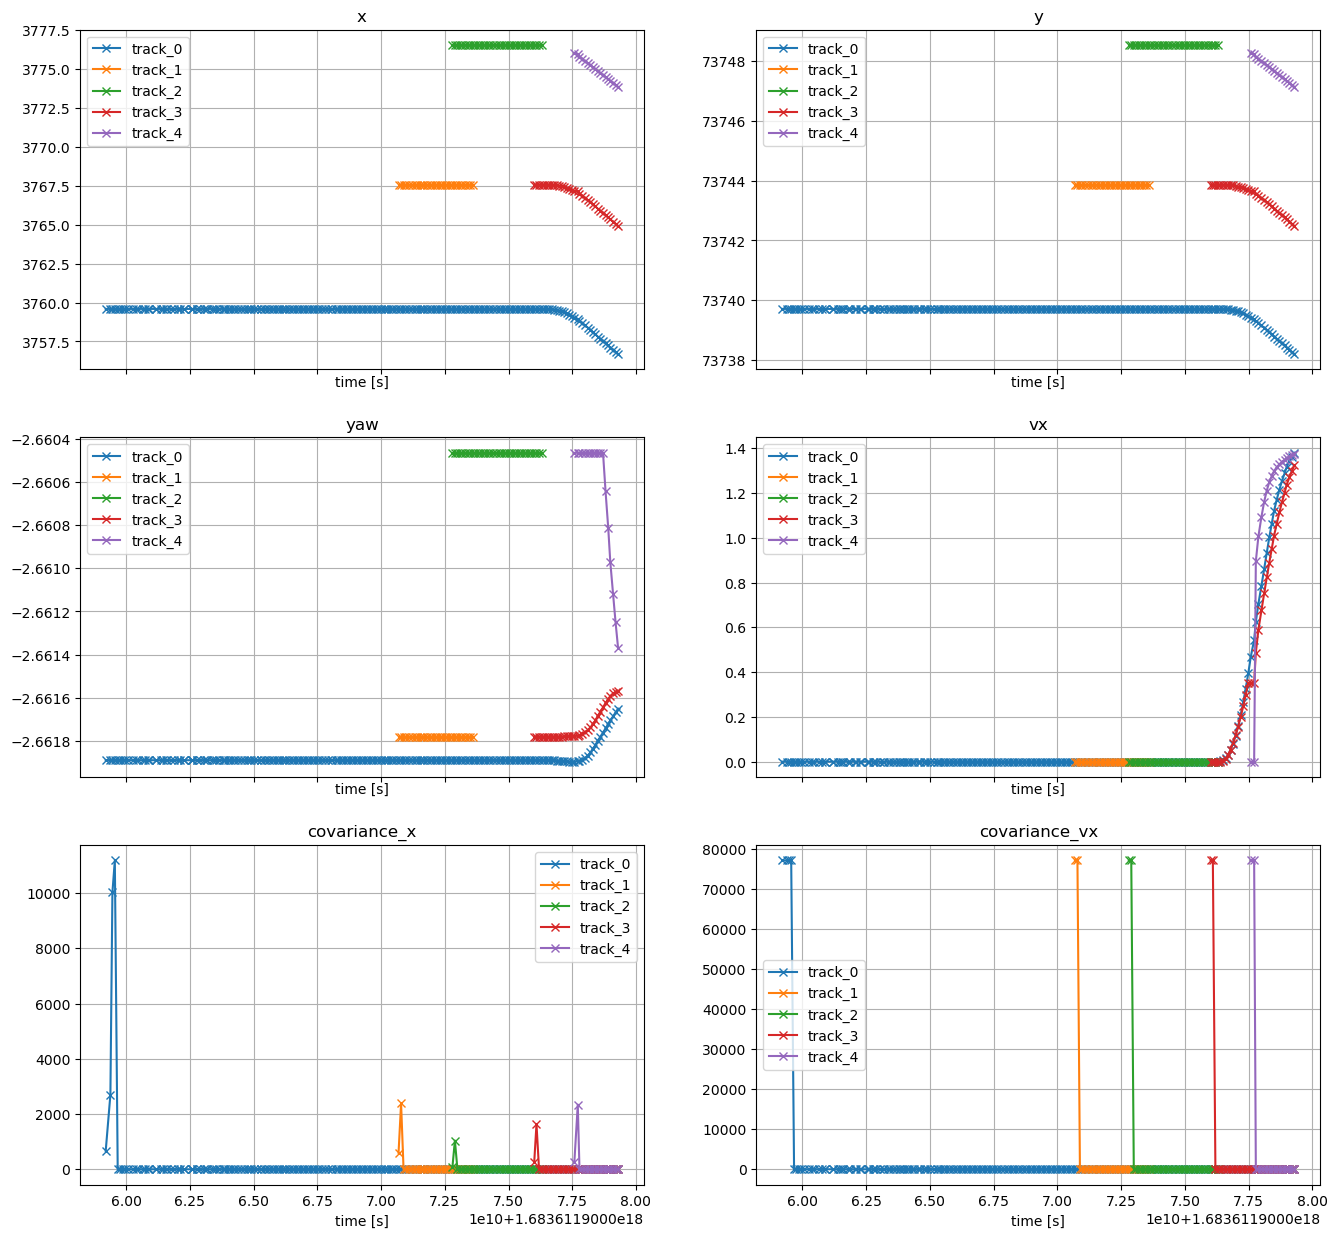

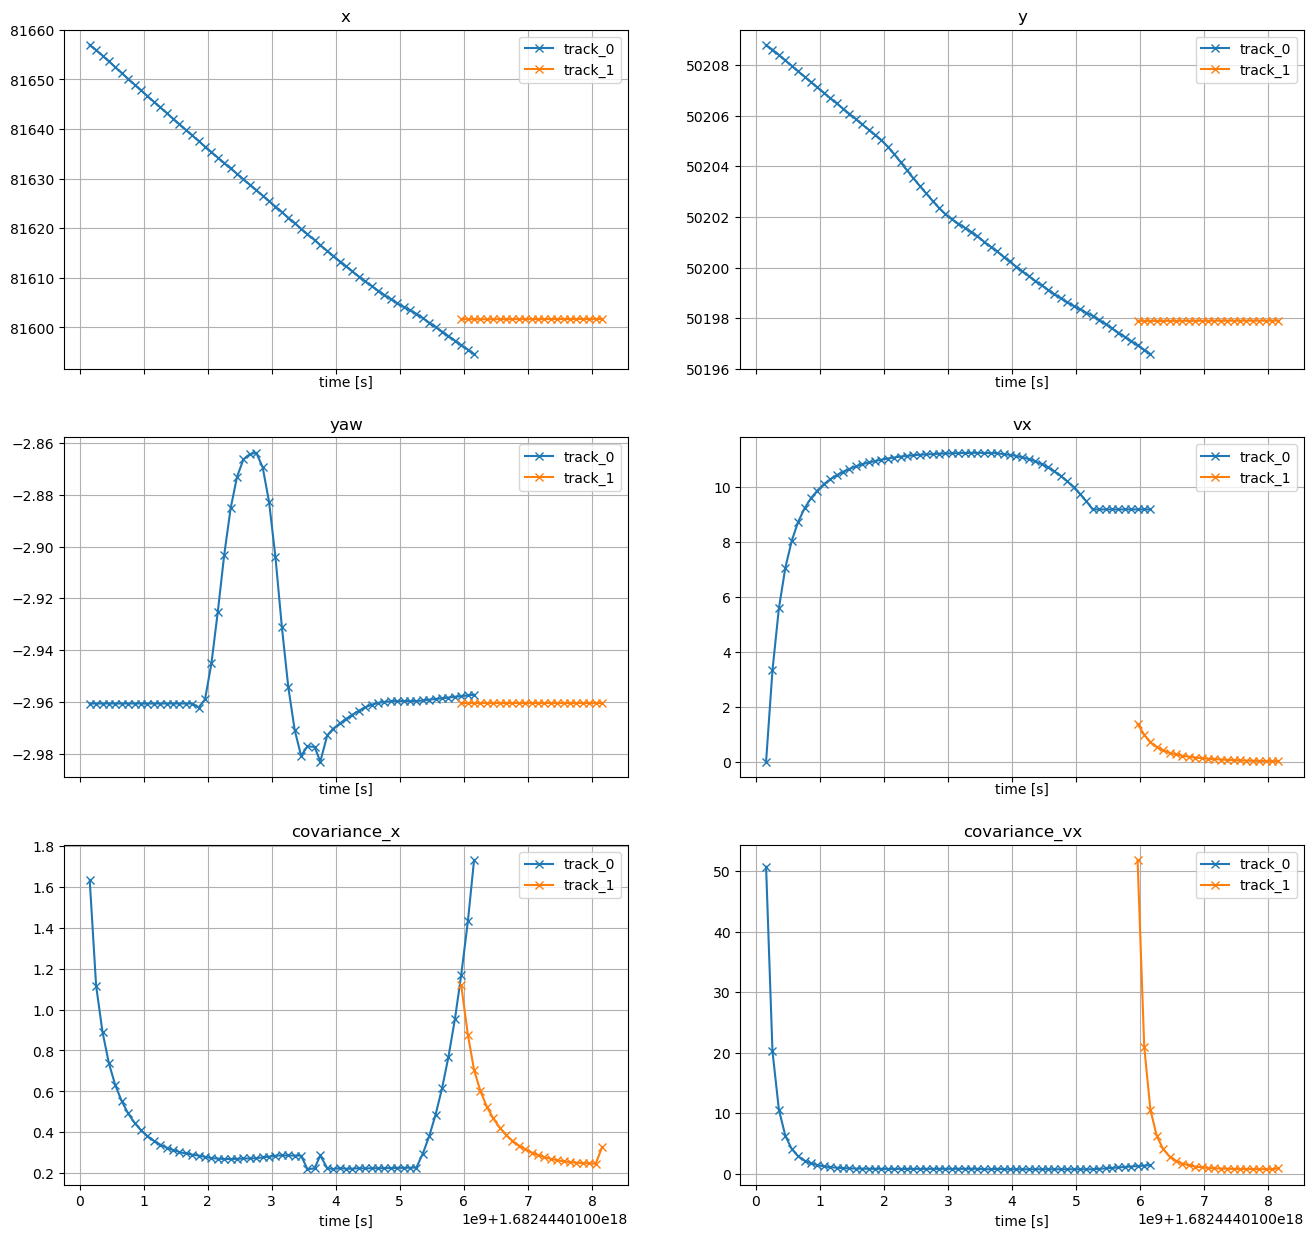

<Figure size 640x480 with 0 Axes>

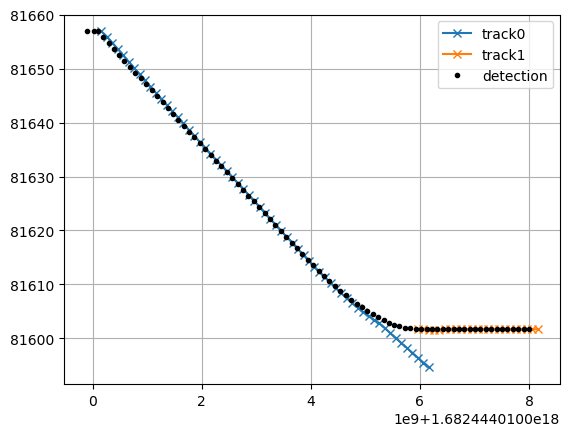

In [39]:
#rosbag_file = "/home/yoshiri/Downloads/temp/kadai117-2/scenario_0_0.db3"
#tp117 = TrackingParser(rosbag_file)
#dp117 = DetectionParser(rosbag_file)

tp117.plot_data()

plt.figure()
tp117.plot_kinematics("time","x")
plt.plot(dp117.data["time"], dp117.data["x"], 'k.')
plt.legend(["track0","track1","detection"])
plt.grid()

In [204]:
from rosbag_parser import get_topics_as_dict

ImportError: cannot import name 'get_topics_as_dict' from 'rosbag_parser' (/home/yoshiri/extension_ws/src/tracking_validation/notebook/../../lanelet_loader/lanelet_loader/rosbag_parser.py)

<AxesSubplot:xlabel='/perception/object_recognition/tracking/objects/header/stamp'>

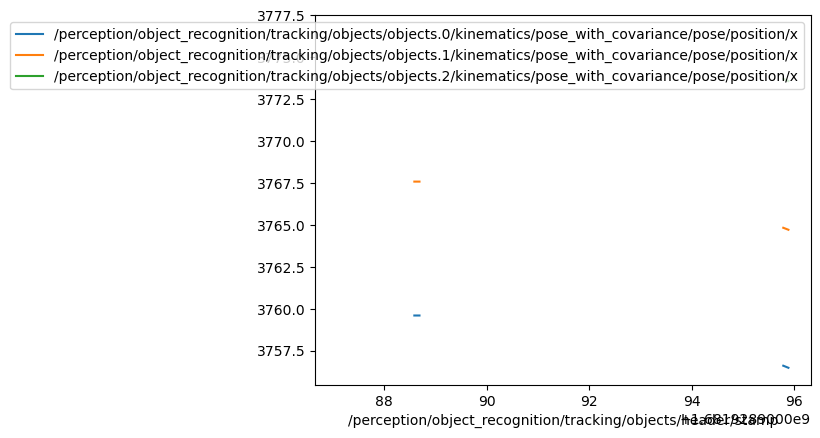

In [109]:
# plot x position of trackers
csv_data.plot(x = stamp_msgs[1],
              y=["/perception/object_recognition/tracking/objects/objects.0/kinematics/pose_with_covariance/pose/position/x",
                 "/perception/object_recognition/tracking/objects/objects.1/kinematics/pose_with_covariance/pose/position/x",
                 "/perception/object_recognition/tracking/objects/objects.2/kinematics/pose_with_covariance/pose/position/x"])

<AxesSubplot:xlabel='/perception/object_recognition/detection/objects/header/stamp'>

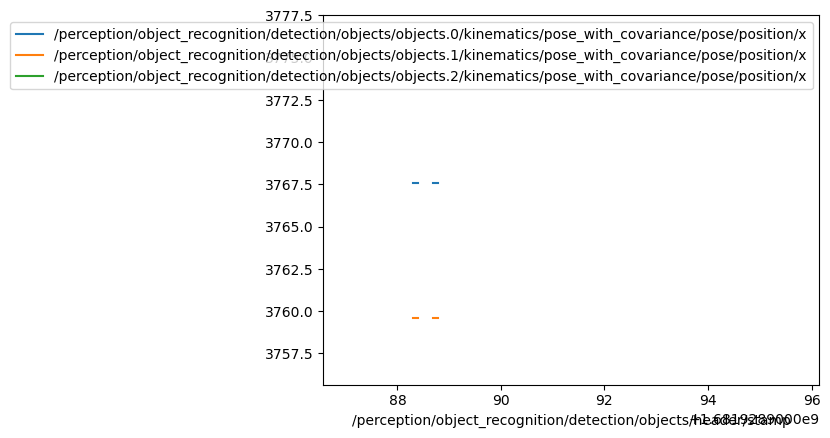

In [114]:
# plot x position of trackers
csv_data.plot(x = stamp_msgs[0],
              y=["/perception/object_recognition/detection/objects/objects.0/kinematics/pose_with_covariance/pose/position/x",
                 "/perception/object_recognition/detection/objects/objects.1/kinematics/pose_with_covariance/pose/position/x",
                 "/perception/object_recognition/detection/objects/objects.2/kinematics/pose_with_covariance/pose/position/x"])

In [92]:
from iou_utils import get_2d_iou

get_2d_iou(test_detected_object, test_detected_object)

AttributeError: module 'tf2_ros' has no attribute 'transformations'